<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_0_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n20.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,0.125325,181.396790,181.215794,0.180996
1,0.0,1.0,84.811384,90.263394,48.152488,0.005432,233.232699,233.278521,-0.045822
2,0.0,2.0,85.367006,79.971966,30.234286,0.036641,205.609899,205.596696,0.013203
3,0.0,3.0,77.359299,99.361088,30.715902,0.008149,217.444438,217.490165,-0.045728
4,0.0,4.0,66.172252,77.690898,81.326401,0.019524,235.209075,235.226024,-0.016949
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,0.046956,191.309529,191.236718,0.072811
119996,999.0,116.0,59.821851,70.493625,39.142519,-0.130478,179.327517,179.426975,-0.099458
119997,999.0,117.0,27.825940,21.812149,86.626142,0.465485,146.729716,146.282050,0.447666
119998,999.0,118.0,98.429329,29.603075,35.081782,0.204464,173.318650,173.081172,0.237478


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,0.125325,181.396790,181.215794,0.180996
1,0.0,1.0,84.811384,90.263394,48.152488,0.005432,233.232699,233.278521,-0.045822
2,0.0,2.0,85.367006,79.971966,30.234286,0.036641,205.609899,205.596696,0.013203
3,0.0,3.0,77.359299,99.361088,30.715902,0.008149,217.444438,217.490165,-0.045728
4,0.0,4.0,66.172252,77.690898,81.326401,0.019524,235.209075,235.226024,-0.016949
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,0.046956,191.309529,191.236718,0.072811
119996,999.0,116.0,59.821851,70.493625,39.142519,-0.130478,179.327517,179.426975,-0.099458
119997,999.0,117.0,27.825940,21.812149,86.626142,0.465485,146.729716,146.282050,0.447666
119998,999.0,118.0,98.429329,29.603075,35.081782,0.204464,173.318650,173.081172,0.237478


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    97.314689  26.811758  47.145018  ...  181.396790  181.215794  0.180996
      1.0    84.811384  90.263394  48.152488  ...  233.232699  233.278521 -0.045822
      2.0    85.367006  79.971966  30.234286  ...  205.609899  205.596696  0.013203
      3.0    77.359299  99.361088  30.715902  ...  217.444438  217.490165 -0.045728
      4.0    66.172252  77.690898  81.326401  ...  235.209075  235.226024 -0.016949
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  74.209446  68.505229  38.547898  ...  191.309529  191.236718  0.072811
      116.0  59.821851  70.493625  39.142519  ...  179.327517  179.426975 -0.099458
      117.0  27.825940  21.812149  86.626142  ...  146.729716  146.282050  0.447666
      118.0  98.429329  29.603075  35.081782  ...  173.318650  173.081172  0.237478
      119.0  48.220330  29.617922  33.572581  ...  121.430240  121.351475  0.078764

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    97.314689  26.811758  47.145018  ...  181.396790  181.215794  0.180996
      1.0    84.811384  90.263394  48.152488  ...  233.232699  233.278521 -0.045822
      2.0    85.367006  79.971966  30.234286  ...  205.609899  205.596696  0.013203
      3.0    77.359299  99.361088  30.715902  ...  217.444438  217.490165 -0.045728
      4.0    66.172252  77.690898  81.326401  ...  235.209075  235.226024 -0.016949
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  74.209446  68.505229  38.547898  ...  191.309529  191.236718  0.072811
      116.0  59.821851  70.493625  39.142519  ...  179.327517  179.426975 -0.099458
      117.0  27.825940  21.812149  86.626142  ...  146.729716  146.282050  0.447666
      118.0  98.429329  29.603075  35.081782  ...  173.318650  173.081172  0.237478
      119.0  48.220330  29.617922  33.572581  ...  121.430240  121.351475  0.078764

[120000 rows x 7 columns]

In [14]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,0.125325,181.396790,181.215794,0.180996
1,0.0,1.0,84.811384,90.263394,48.152488,0.005432,233.232699,233.278521,-0.045822
2,0.0,2.0,85.367006,79.971966,30.234286,0.036641,205.609899,205.596696,0.013203
3,0.0,3.0,77.359299,99.361088,30.715902,0.008149,217.444438,217.490165,-0.045728
4,0.0,4.0,66.172252,77.690898,81.326401,0.019524,235.209075,235.226024,-0.016949
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,0.046956,191.309529,191.236718,0.072811
119996,999.0,116.0,59.821851,70.493625,39.142519,-0.130478,179.327517,179.426975,-0.099458
119997,999.0,117.0,27.825940,21.812149,86.626142,0.465485,146.729716,146.282050,0.447666
119998,999.0,118.0,98.429329,29.603075,35.081782,0.204464,173.318650,173.081172,0.237478


In [15]:
table.set_index(['rep', 'index'], inplace=True)

In [16]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    97.314689  26.811758  47.145018  ...  181.396790  181.215794  0.180996
      1.0    84.811384  90.263394  48.152488  ...  233.232699  233.278521 -0.045822
      2.0    85.367006  79.971966  30.234286  ...  205.609899  205.596696  0.013203
      3.0    77.359299  99.361088  30.715902  ...  217.444438  217.490165 -0.045728
      4.0    66.172252  77.690898  81.326401  ...  235.209075  235.226024 -0.016949
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  74.209446  68.505229  38.547898  ...  191.309529  191.236718  0.072811
      116.0  59.821851  70.493625  39.142519  ...  179.327517  179.426975 -0.099458
      117.0  27.825940  21.812149  86.626142  ...  146.729716  146.282050  0.447666
      118.0  98.429329  29.603075  35.081782  ...  173.318650  173.081172  0.237478
      119.0  48.220330  29.617922  33.572581  ...  121.430240  121.351475  0.078764

[120000 rows x 7 columns]

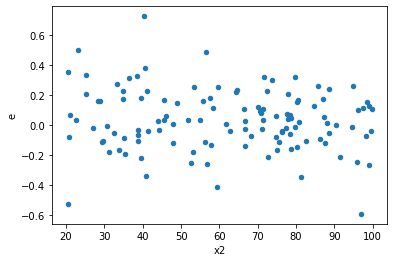

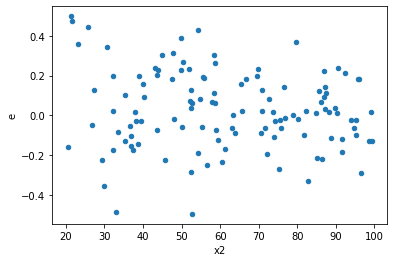

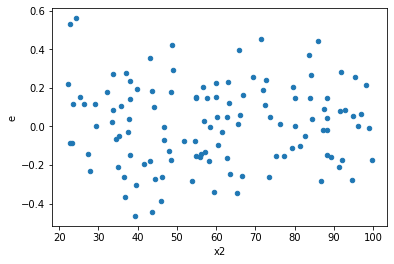

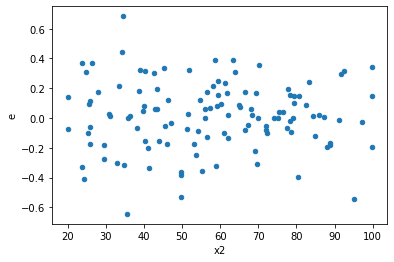

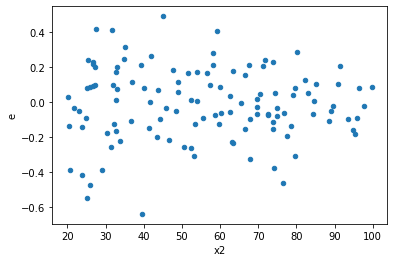

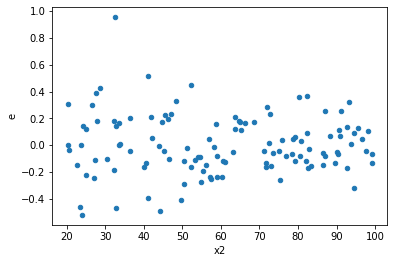

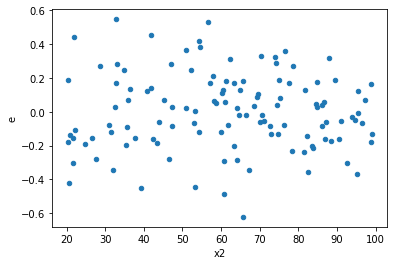

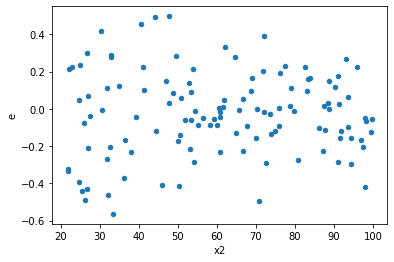

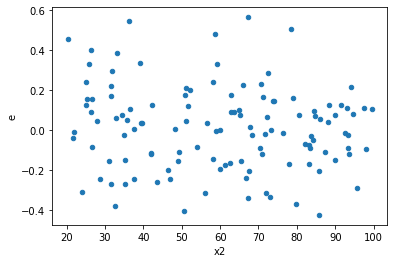

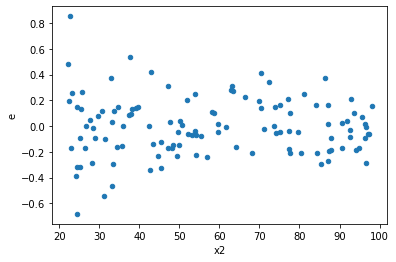

In [17]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [18]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
212.0,45.0,45.0,2.103074962652014,2.41467969238447,0.046734999170044755,0.053659548719654886,1.1481662495470522,0.6450325711796281,0.677483714410186,0.32251628558981404,Reject005=1 : Homoscedasticity
218.0,45.0,45.0,1.7103468461796898,1.8080278156348006,0.038007707692881997,0.04017839590299557,1.0571117897362723,0.8530372223788207,0.5734813888105896,0.42651861118941037,Reject005=1 : Homoscedasticity
221.0,45.0,45.0,1.2347464759145348,1.425138432895579,0.02743881057587855,0.03166974295323509,1.1541951815169404,0.6325639609426634,0.6837180195286683,0.3162819804713317,Reject005=1 : Homoscedasticity
337.0,45.0,45.0,2.1145762237393226,2.117862989368537,0.04699058274976273,0.04706362198596749,1.0015543377402598,0.9958665765397738,0.5020667117301131,0.4979332882698869,Reject005=1 : Homoscedasticity
352.0,45.0,45.0,1.6526931238478535,1.7634216713671618,0.03672651386328563,0.039187148252603596,1.0669988553358936,0.8287621886979817,0.5856189056510092,0.41438109434899084,Reject005=1 : Homoscedasticity
468.0,45.0,45.0,1.764070671243711,1.8357117284557893,0.03920157047208247,0.04079359396568421,1.040611217214767,0.8943698211293805,0.5528150894353098,0.44718491056469023,Reject005=1 : Homoscedasticity
472.0,45.0,45.0,1.708806515278112,1.8833232021273512,0.037973478117291376,0.04185162671394114,1.1021278215461605,0.7457173026143482,0.6271413486928259,0.3728586513071741,Reject005=1 : Homoscedasticity
491.0,45.0,45.0,1.7731416999554337,1.8909374281343236,0.039403148887898524,0.042020831736318306,1.0664333415551903,0.8301403815470558,0.5849298092264721,0.4150701907735279,Reject005=1 : Homoscedasticity
515.0,45.0,45.0,1.3949416488187976,1.4824853445355828,0.03099870330708439,0.0329441187674574,1.0627579625218841,0.8391281049557804,0.5804359475221098,0.4195640524778902,Reject005=1 : Homoscedasticity


In [20]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,1.9404045810054327,0.9108858167060188,0.04312010180012073,0.020241907037911528,0.46943087313988796,0.012649942403731719,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,3.158432678686909,1.023322608919686,0.07018739285970908,0.02274050242043747,0.3239969671745936,0.00024562141705250273,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,2.509518434212181,1.1321021412557952,0.05576707631582624,0.025157825361239894,0.45112326166721256,0.008755392550663543,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,2.758996631518195,1.289307100117135,0.061311036255959885,0.028651268891491888,0.46731013926887877,0.01213941019682901,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,2.0269587760615333,1.204193794150898,0.04504352835692296,0.026759862092242178,0.5940889417054143,0.0841169089072688,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,2.63287155714934,1.12400107615755,0.058508256825540894,0.02497780169239,0.4269107139333934,0.005139298188160842,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,2.029267031798278,1.0985730124997342,0.04509482292885063,0.024412733611105204,0.541364441093891,0.04223009444123041,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,2.675780322179335,1.407090104189852,0.05946178493731855,0.03126866898199671,0.5258615935421125,0.03351446778522319,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,2.0633452311927587,1.1046922099141208,0.045852116248727974,0.02454871577586935,0.5353889369621054,0.03869501257418941,Reject005=0 : Heteroscedasticity


In [21]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    678
Reject005=1 : Homoscedasticity      322
Name: Result_test, dtype: int64